# DATA reading and exploration

In [1]:
import pandas as pd
from ast import literal_eval

In [2]:
df = pd.read_csv("data.csv",converters={"mutations": literal_eval, "mut_positions": literal_eval}, index_col=0)

In [3]:
df.describe()

,target,num_mutations
count,107.000000,107.000000
mean,61.246729,9.598131
std,5.299926,2.554537
min,49.570000,0.000000
25%,57.415000,9.000000
50%,61.330000,11.000000
75%,65.815000,11.000000
max,71.110000,12.000000


# Preprocessing

In [4]:
dfdummied = pd.concat([df[["primary", "target", "mutations"]], pd.get_dummies(df["mutations"].apply(pd.Series).stack()).sum(level=0)], axis=1).fillna(0.0)
dfdummied

/tmp/ipykernel_24789/1919573092.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfdummied = pd.concat([df[["primary", "target", "mutations"]], pd.get_dummies(df["mutations"].apply(pd.Series).stack()).sum(level=0)], axis=1).fillna(0.0)
/tmp/ipykernel_24789/1919573092.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfdummied = pd.concat([df[["primary", "target", "mutations"]], pd.get_dummies(df["mutations"].apply(pd.Series).stack()).sum(level=0)], axis=1).fillna(0.0)


,primary,target,mutations,A192F,A192I,A192K,A192R,A192V,G212E,G212F,...,V194I,V194L,V207A,V207I,V207L,Y108W,Y23F,Y23K,Y23R,Y23W
0,MNLVLMGLPGAGKGTQGERIVEDYGIPHISTGDMFRAAMKEETPLG...,49.57,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MNLVLMGLPGAGKGTQGERIVEDYGIPHISTGDMFRAAMKEETPLG...,51.33,[Q198R],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MNLVLMGLPGAGKGTQGERIVEDYGIPHISTGDMFRAAMKEETPLG...,52.47,"[Q198R, G213R]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MNLVLMGLPGAGKGTQGERIVEDYGIPHISTGDMFRAAMKEETPLG...,52.72,"[Q198R, G212E]",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MNLVLMGLPGAGKGTQGERIVEDYGIPHISTGDMFRAAMKEETPLG...,53.43,"[A192V, Q198R]",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,MNIVLMGLPGAGKGTQGERLVEDWGFPHISTGDMFRAAMKEETPLG...,60.96,"[L2I, I19L, Y23W, I25F, T178I, A192F, V207L, L...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
103,MNIVLMGLPGAGKGTQGERLVEDRGFPHISTGDMFRAAMKEETPLG...,53.91,"[L2I, I19L, Y23R, I25F, I110F, T178I, A192R, V...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
104,MNIVLMGLPGAGKGTQGERLVEDWGFPHISTGDMFRAAMKEETPLG...,60.96,"[L2I, I19L, Y23W, I25F, T178I, A192K, V194I, V...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
105,MNIVLMGLPGAGKGTQGERLVEDWGFPHISTGDMFRAAMKEETPLG...,60.82,"[L2I, I19L, Y23W, I25F, T178I, A192R, V194I, Q...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
mutations_cols = list(set(dfdummied.columns)-set(["primary", "target", "mutations"]))
vals = dfdummied[mutations_cols].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vals = scaler.fit_transform(vals)

In [6]:
dfdummied[mutations_cols].sum().sort_values()

G212S     1.0
L211F     1.0
G212E     1.0
V194L     1.0
T178F     1.0
A192V     1.0
V207A     1.0
I19F      1.0
G213S     1.0
G212I     2.0
G213I     2.0
Q15L      3.0
G213R     3.0
G212F     4.0
L4V       4.0
Y108W     4.0
L210W     5.0
T178W     6.0
G213F     6.0
I110V     7.0
Y23K      9.0
T178L    10.0
A192I    11.0
Q198R    11.0
Q198K    12.0
G213K    13.0
V207I    17.0
G212K    18.0
A192F    19.0
I25F     20.0
A192K    21.0
Y23W     21.0
I19L     23.0
Y23R     24.0
L210I    33.0
A192R    39.0
Y23F     46.0
L210F    53.0
G212R    55.0
I110F    55.0
I112L    64.0
T178I    74.0
V194I    75.0
V207L    82.0
Q15I     83.0
L2I      84.0
dtype: float64

# Lazy predict compares all sklearn regressors

In [19]:
from lazypredict.Supervised import LazyRegressor

from sklearn.utils import shuffle
import numpy as np
X, y = shuffle(vals, dfdummied.target, random_state=42)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models = models.sort_values("RMSE")
models

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 22.43it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,1.21,0.91,1.73,0.04
XGBRegressor,1.24,0.90,1.84,0.12
GradientBoostingRegressor,1.24,0.89,1.87,0.06
PoissonRegressor,1.27,0.88,1.96,0.03
LassoLarsCV,1.27,0.88,1.98,0.05
ElasticNetCV,1.27,0.88,1.99,0.18
Ridge,1.28,0.88,2.01,0.01
BayesianRidge,1.28,0.88,2.01,0.01
LassoCV,1.28,0.88,2.01,0.17


# Lets train the top 3 best regressors and perform hyperparameters tuning

In [20]:
from sklearn.metrics import mean_squared_error
def eval_model(model, Xtest, ytest):
    ypred = model.predict(Xtest)
    mse = mean_squared_error(ytest, ypred)
    return {"R2": model.score(Xtest, ytest), "MSE": mse, "RMSE": np.sqrt(mse)}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

def train_and_evaluate_model(modeltype, Xtrain, ytrain, Xtest, ytest, param_grid):
    if modelname =="GradientBoostingRegressor":
        modelcv = GradientBoostingRegressor()
    if modelname =="XGBRegressor":
        modelcv = XGBRegressor()
    if modelname =="RandomForestRegressor":
        modelcv = RandomForestRegressor()
    cv = GridSearchCV(modelcv, param_grid, cv=5, scoring='r2')
    cv.fit(X_train, y_train)

    # Print the best hyperparameters
    if modelname =="GradientBoostingRegressor":
        model = GradientBoostingRegressor(random_state=42, **cv.best_params_)
    if modelname =="XGBRegressor":
        model = XGBRegressor(random_state=42, **cv.best_params_)
    if modelname =="RandomForestRegressor":
        model = RandomForestRegressor(random_state=42, **cv.best_params_)
    
    model.fit(X_train, y_train)
    score = eval_model(model, X_test, y_test)
    return score, model

In [22]:

models_names = [
                "GradientBoostingRegressor",
                "RandomForestRegressor",
                "XGBRegressor"
                ]
models_names

['GradientBoostingRegressor', 'RandomForestRegressor', 'XGBRegressor']

In [28]:
scores = {"Model_name": [], "R2": [], "MSE": [], "RMSE": []}
param_grid = {
                "GradientBoostingRegressor": {
                                            'learning_rate': [0.05, 0.1, 0.2],
                                            'max_depth': [3, 5, 7],
                                            'n_estimators': [10, 50, 100]
                                            },
                "XGBRegressor": {
                                    'learning_rate': [0.05, 0.1, 2],
                                    'max_depth': [3, 5, 7],
                                    'n_estimators': [10, 50, 100]
                                    },
                "RandomForestRegressor": {
                                        'n_estimators': [10, 50, 100],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 3, 5]
                                        }
             }
trained_models = {}
for modelname in models_names:
    scoresmodel, trained_model = train_and_evaluate_model(modelname, X_train, y_train, X_test, y_test, param_grid[modelname])
    scores["Model_name"].append(modelname)
    scores["R2"].append(scoresmodel["R2"])
    scores["MSE"].append(scoresmodel["MSE"])
    scores["RMSE"].append(scoresmodel["RMSE"])
    trained_models[modelname] = trained_model
scores = pd.DataFrame.from_dict(scores) 

In [29]:
scores

,Model_name,R2,MSE,RMSE
0,GradientBoostingRegressor,0.89,3.49,1.87
1,RandomForestRegressor,0.87,4.30,2.07
2,XGBRegressor,0.90,3.34,1.83


In [30]:
trained_models

{'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
 'RandomForestRegressor': RandomForestRegressor(max_depth=7, n_estimators=10, random_state=42),
 'XGBRegressor': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)}

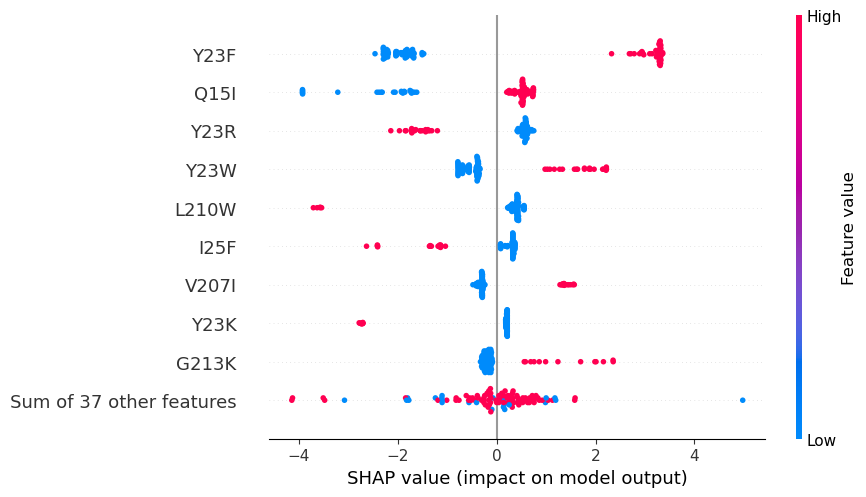

In [52]:
import shap
explainer_ebm = shap.Explainer(trained_models["XGBRegressor"].predict, X)
shap_values_ebm = explainer_ebm(pd.DataFrame(X, columns = mutations_cols))

# make a standard partial dependence plot with a single SHAP value overlaid
shap.plots.beeswarm(shap_values_ebm)

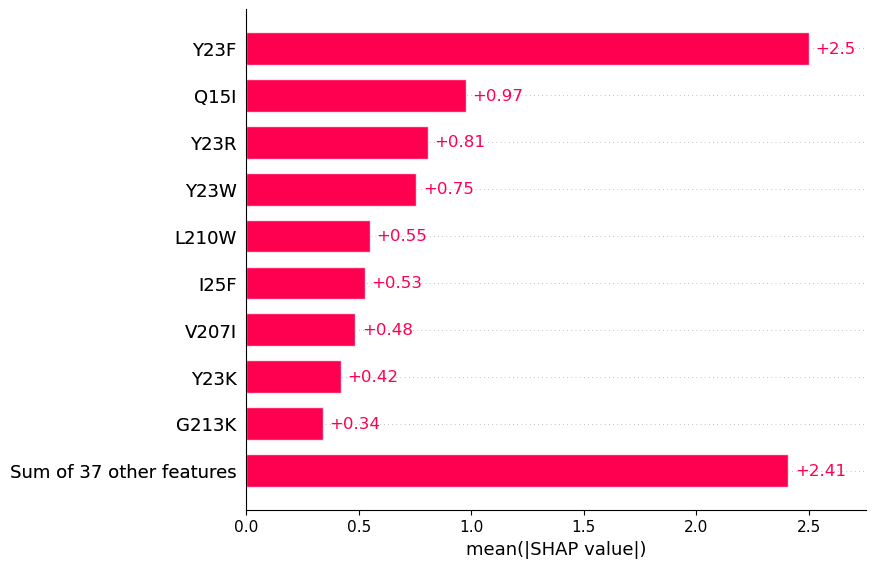

In [53]:
shap.plots.bar(shap_values_ebm)